<a href="https://colab.research.google.com/github/BlackCurrantDS/DeepLearning/blob/main/IDL_Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References- https://www.tensorflow.org/tutorials/images/cnn

In [1]:
#Unzipping the file
!unzip "/content/drive/MyDrive/cifar_attempts"

Archive:  /content/drive/MyDrive/cifar_attempts.zip
  inflating: data1.npz               
  inflating: data2.npz               
  inflating: data3.npz               
  inflating: data4.npz               


For Data1

In [95]:
from tempfile import TemporaryFile
import numpy as np

outfile = TemporaryFile()

npzfile = np.load('/content/data1.npz')

print(npzfile.files)

['train_imgs', 'train_lbls', 'val_imgs', 'val_lbls', 'test_imgs', 'test_lbls']


In [96]:
train_images, train_labels, validation_images, validation_labels, test_images, test_labels = npzfile['train_imgs'], npzfile['train_lbls'], npzfile['val_imgs'], npzfile['val_lbls'], npzfile['test_imgs'], npzfile['test_lbls']

In [97]:
print("Training ",train_images.shape,len(train_labels))
print("Validation ",validation_images.shape,len(validation_labels))
print("Test ",test_images.shape,len(test_labels))

Training  (36004, 32, 32, 3) 36004
Validation  (3996, 32, 32, 3) 3996
Test  (10000, 32, 32, 3) 10000


In [9]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [13]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [19]:
train_data = tf.data.Dataset.from_tensor_slices((train_images.astype(np.float32) / 255, train_labels.astype(np.int32)))
train_data = train_data.shuffle(buffer_size=60000).batch(128).repeat()


validation_data = tf.data.Dataset.from_tensor_slices((validation_images.astype(np.float32) / 255, 
                                                    validation_labels.astype(np.int32))).batch(128)


test_data = tf.data.Dataset.from_tensor_slices((test_images.astype(np.float32) / 255, 
                                                test_labels.astype(np.int32))).batch(128)

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(validation_images, validation_labels))

Epoch 1/10
1126/1126 [==============================] - 46s 40ms/step - loss: 1.6603 - accuracy: 0.3513 - val_loss: 1.1278 - val_accuracy: 0.5861
Epoch 2/10
1126/1126 [==============================] - 45s 40ms/step - loss: 1.1004 - accuracy: 0.5948 - val_loss: 1.0160 - val_accuracy: 0.6316
Epoch 3/10
1126/1126 [==============================] - 44s 39ms/step - loss: 0.9194 - accuracy: 0.6692 - val_loss: 0.8127 - val_accuracy: 0.7150
Epoch 4/10
1126/1126 [==============================] - 44s 39ms/step - loss: 0.8101 - accuracy: 0.7127 - val_loss: 0.8056 - val_accuracy: 0.7175
Epoch 5/10
1126/1126 [==============================] - 44s 39ms/step - loss: 0.7336 - accuracy: 0.7412 - val_loss: 0.7254 - val_accuracy: 0.7427
Epoch 6/10
1126/1126 [==============================] - 42s 37ms/step - loss: 0.6816 - accuracy: 0.7566 - val_loss: 0.7579 - val_accuracy: 0.7310
Epoch 7/10
1126/1126 [==============================] - 42s 38ms/step - loss: 0.6103 - accuracy: 0.7863 - val_loss: 0.6871 -

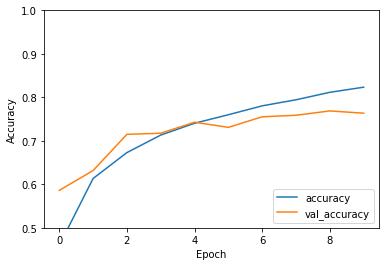

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [23]:

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 3s - loss: 5.2057 - accuracy: 0.6018


In [24]:
print(test_acc)

0.6018000245094299


In [25]:
import seaborn as sns

In [26]:
#checking test labels
sns.countplot(test_labels)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


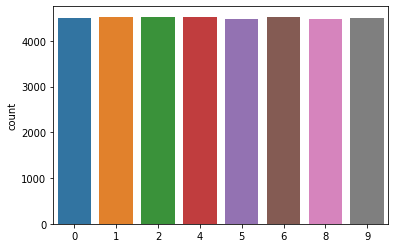

In [27]:
#Checking training labels
sns.countplot(train_labels)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


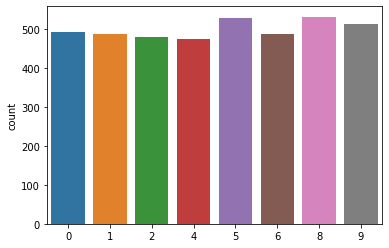

In [28]:
#checking validation labels
sns.countplot(validation_labels)

Looks like in data1 Label 3 and 7 are missing from train adn validation set and is avaiable in test set.

Data2

In [98]:
from tempfile import TemporaryFile
import numpy as np

outfile = TemporaryFile()

npzfile = np.load('/content/data2.npz')

print(npzfile.files)

['train_imgs', 'train_lbls', 'val_imgs', 'val_lbls', 'test_imgs', 'test_lbls']


In [99]:
train_images, train_labels, validation_images, validation_labels, test_images, test_labels = npzfile['train_imgs'], npzfile['train_lbls'], npzfile['val_imgs'], npzfile['val_lbls'], npzfile['test_imgs'], npzfile['test_lbls']

In [100]:
print("Training ",train_images.shape,len(train_labels))
print("Validation ",validation_images.shape,len(validation_labels))
print("Test ",test_images.shape,len(test_labels))

Training  (50000, 32, 32, 3) 50000
Validation  (5000, 32, 32, 3) 5000
Test  (10000, 32, 32, 3) 10000


In [101]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

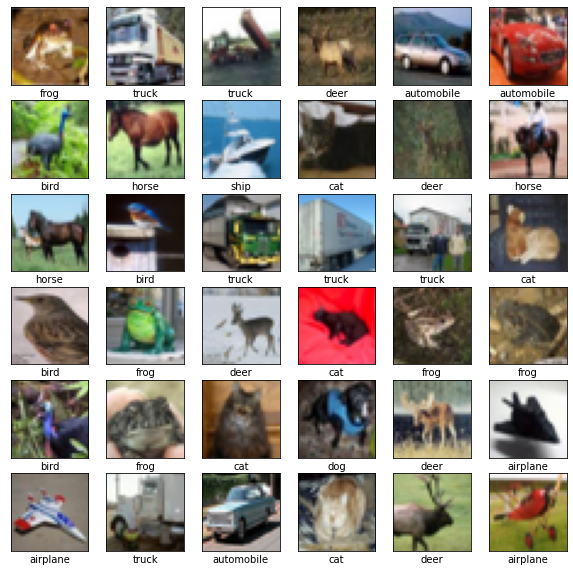

In [103]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

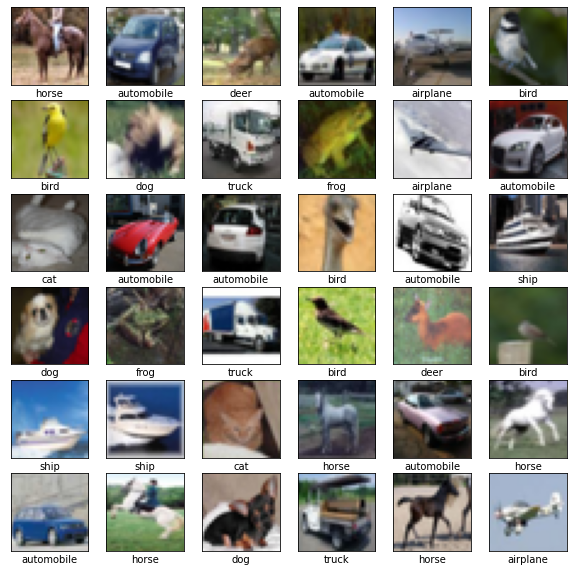

In [104]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(validation_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[validation_labels[i]])
plt.show()

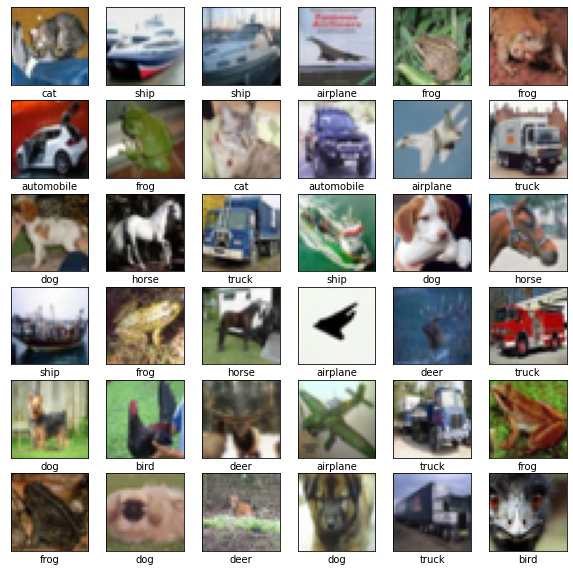

In [105]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[test_labels[i]])
plt.show()

In [33]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [37]:
train_data = tf.data.Dataset.from_tensor_slices((train_images.astype(np.float32) / 255, train_labels.astype(np.int32)))
train_data = train_data.shuffle(buffer_size=60000).batch(128).repeat()


validation_data = tf.data.Dataset.from_tensor_slices((validation_images.astype(np.float32) / 255, 
                                                    validation_labels.astype(np.int32))).batch(128)


test_data = tf.data.Dataset.from_tensor_slices((test_images.astype(np.float32) / 255, 
                                                test_labels.astype(np.int32))).batch(128)

In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(validation_images, validation_labels))

Epoch 1/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.7749 - accuracy: 0.3410 - val_loss: 1.2703 - val_accuracy: 0.5560
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1850 - accuracy: 0.5801 - val_loss: 1.0385 - val_accuracy: 0.6304
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0117 - accuracy: 0.6432 - val_loss: 0.9031 - val_accuracy: 0.6880
Epoch 4/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9140 - accuracy: 0.6777 - val_loss: 0.8279 - val_accuracy: 0.7088
Epoch 5/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8266 - accuracy: 0.7113 - val_loss: 0.7179 - val_accuracy: 0.7474
Epoch 6/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7630 - accuracy: 0.7333 - val_loss: 0.6893 - val_accuracy: 0.7582
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7171 - accuracy: 0.7478 - val_loss: 0.6485 -

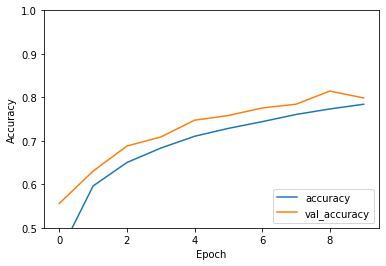

In [39]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [40]:

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 3s - loss: 0.8825 - accuracy: 0.7030


In [41]:
print(test_acc)

0.703000009059906


In [42]:
import seaborn as sns

In [43]:
#checking test labels
sns.countplot(test_labels)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


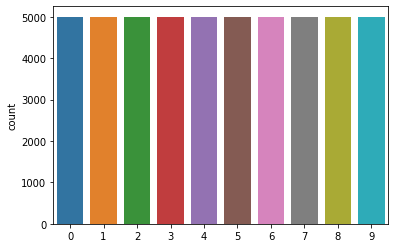

In [44]:
#Checking training labels
sns.countplot(train_labels)

In [45]:
#checking validation labels
sns.countplot(validation_labels)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1. All lables are there
2. lesser diff in test accuracy than data1.
3. Little more training dtaa than all other data sets
4. labels seems correct as well.

Data3

In [48]:
from tempfile import TemporaryFile
import numpy as np

outfile = TemporaryFile()

npzfile = np.load('/content/data3.npz')

print(npzfile.files)

['train_imgs', 'train_lbls', 'val_imgs', 'val_lbls', 'test_imgs', 'test_lbls']


In [49]:
train_images, train_labels, validation_images, validation_labels, test_images, test_labels = npzfile['train_imgs'], npzfile['train_lbls'], npzfile['val_imgs'], npzfile['val_lbls'], npzfile['test_imgs'], npzfile['test_lbls']

In [71]:
print("Training ",train_images.shape,len(train_labels))
print("Validation ",validation_images.shape,len(validation_labels))
print("Test ",test_images.shape,len(test_labels))

Training  (45000, 32, 32, 3) 45000
Validation  (5000, 32, 32, 3) 5000
Test  (10000, 32, 32, 3) 10000


In [50]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [51]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

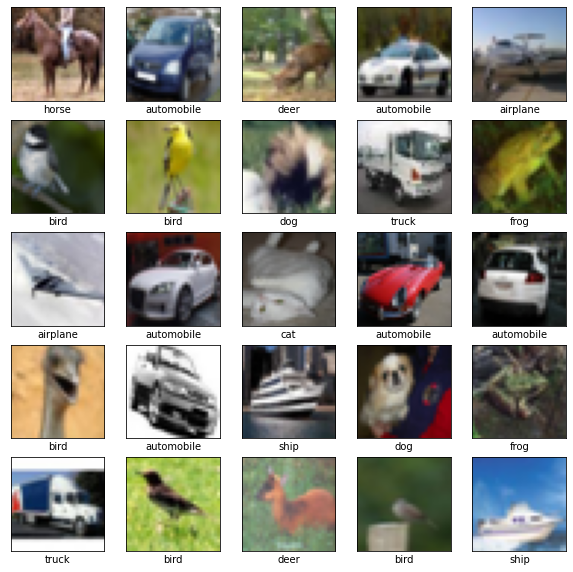

In [52]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(validation_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[validation_labels[i]])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

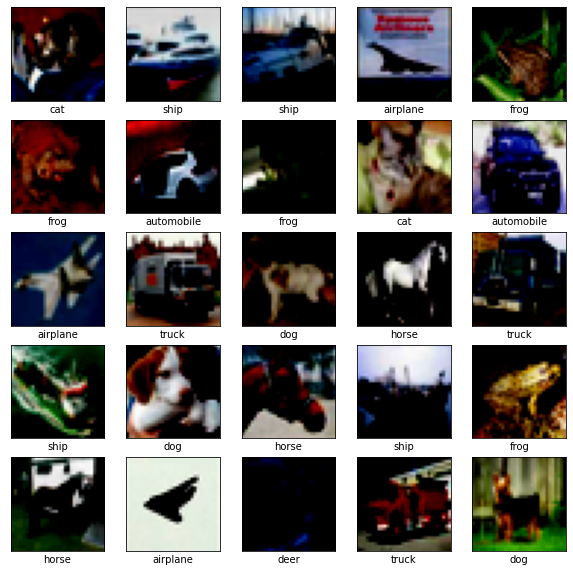

In [53]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[test_labels[i]])
plt.show()

In [54]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [58]:
train_data = tf.data.Dataset.from_tensor_slices((train_images.astype(np.float32) / 255, train_labels.astype(np.int32)))
train_data = train_data.shuffle(buffer_size=60000).batch(128).repeat()


validation_data = tf.data.Dataset.from_tensor_slices((validation_images.astype(np.float32) / 255, 
                                                    validation_labels.astype(np.int32))).batch(128)


test_data = tf.data.Dataset.from_tensor_slices((test_images.astype(np.float32) / 255, 
                                                test_labels.astype(np.int32))).batch(128)

In [59]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(validation_images, validation_labels))

Epoch 1/10
1407/1407 [==============================] - 49s 34ms/step - loss: 1.8053 - accuracy: 0.3287 - val_loss: 1.2881 - val_accuracy: 0.5282
Epoch 2/10
1407/1407 [==============================] - 48s 34ms/step - loss: 1.2218 - accuracy: 0.5617 - val_loss: 1.0911 - val_accuracy: 0.6138
Epoch 3/10
1407/1407 [==============================] - 48s 34ms/step - loss: 1.0611 - accuracy: 0.6250 - val_loss: 0.9800 - val_accuracy: 0.6590
Epoch 4/10
1407/1407 [==============================] - 49s 35ms/step - loss: 0.9392 - accuracy: 0.6687 - val_loss: 0.9329 - val_accuracy: 0.6748
Epoch 5/10
1407/1407 [==============================] - 49s 35ms/step - loss: 0.8608 - accuracy: 0.7004 - val_loss: 0.9043 - val_accuracy: 0.6872
Epoch 6/10
1407/1407 [==============================] - 49s 35ms/step - loss: 0.7965 - accuracy: 0.7201 - val_loss: 0.8287 - val_accuracy: 0.7160
Epoch 7/10
1407/1407 [==============================] - 49s 35ms/step - loss: 0.7235 - accuracy: 0.7444 - val_loss: 0.7985 -

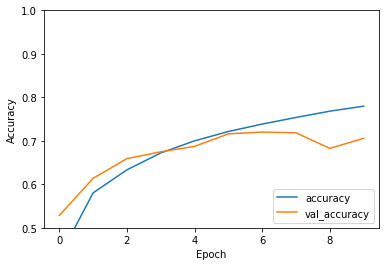

In [60]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [61]:

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 3s - loss: 2.8409 - accuracy: 0.4588


In [62]:
print(test_acc)

0.45879998803138733


In [63]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


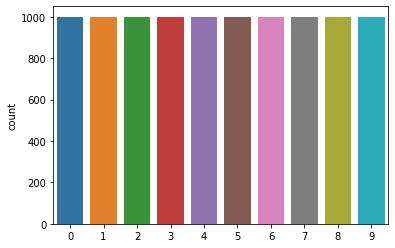

In [64]:
#checking test labels
sns.countplot(test_labels)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


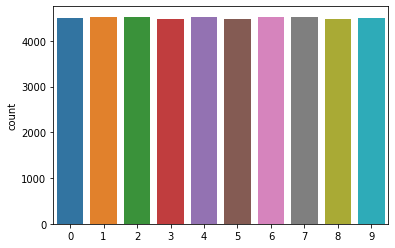

In [65]:
#Checking training labels
sns.countplot(train_labels)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


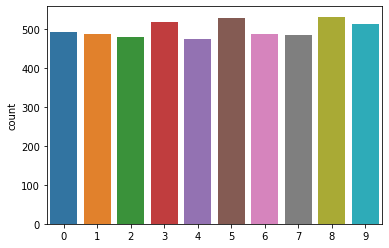

In [66]:
#checking validation labels
sns.countplot(validation_labels)

Test images seems to have out of range values.

Data4

In [72]:
from tempfile import TemporaryFile
import numpy as np

outfile = TemporaryFile()

npzfile = np.load('/content/data4.npz')

print(npzfile.files)

['train_imgs', 'train_lbls', 'val_imgs', 'val_lbls', 'test_imgs', 'test_lbls']


In [73]:
train_images, train_labels, validation_images, validation_labels, test_images, test_labels = npzfile['train_imgs'], npzfile['train_lbls'], npzfile['val_imgs'], npzfile['val_lbls'], npzfile['test_imgs'], npzfile['test_lbls']

In [74]:
print("Training ",train_images.shape,len(train_labels))
print("Validation ",validation_images.shape,len(validation_labels))
print("Test ",test_images.shape,len(test_labels))

Training  (45000, 32, 32, 3) 45000
Validation  (5000, 32, 32, 3) 5000
Test  (10000, 32, 32, 3) 10000


In [75]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

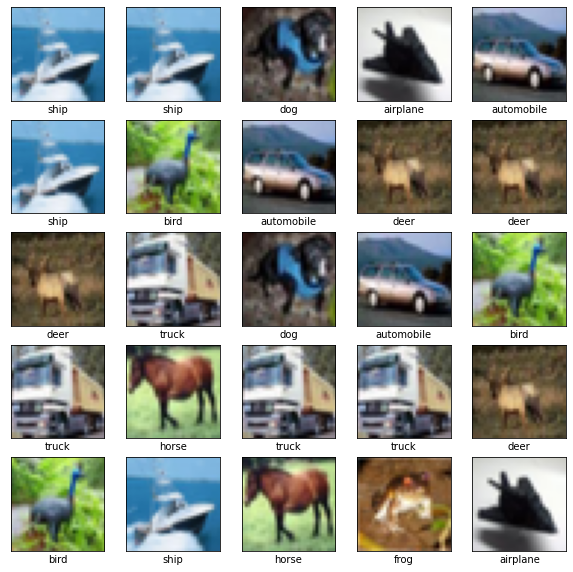

In [76]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

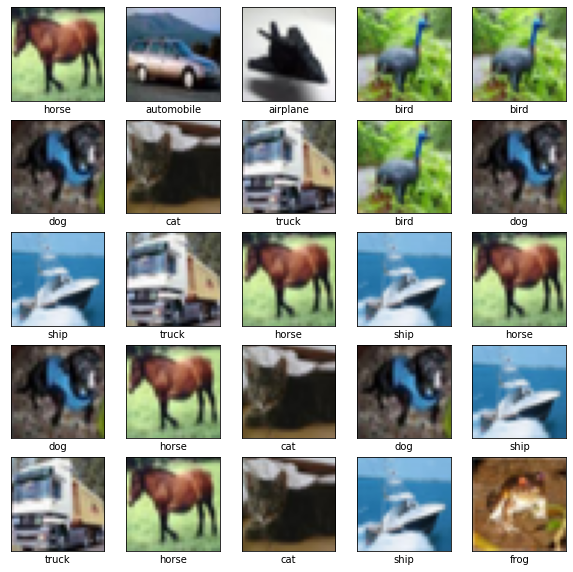

In [77]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(validation_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[validation_labels[i]])
plt.show()

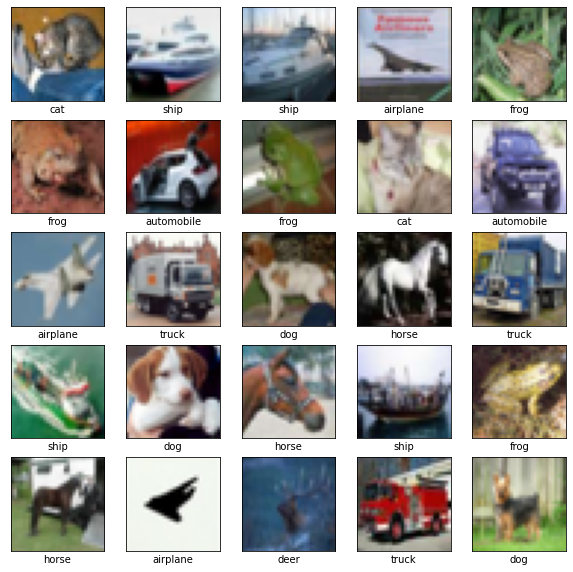

In [78]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[test_labels[i]])
plt.show()

In [79]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [80]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [82]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [83]:
train_data = tf.data.Dataset.from_tensor_slices((train_images.astype(np.float32) / 255, train_labels.astype(np.int32)))
train_data = train_data.shuffle(buffer_size=60000).batch(128).repeat()


validation_data = tf.data.Dataset.from_tensor_slices((validation_images.astype(np.float32) / 255, 
                                                    validation_labels.astype(np.int32))).batch(128)


test_data = tf.data.Dataset.from_tensor_slices((test_images.astype(np.float32) / 255, 
                                                test_labels.astype(np.int32))).batch(128)

In [84]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(validation_images, validation_labels))

Epoch 1/10
1407/1407 [==============================] - 51s 36ms/step - loss: 0.1398 - accuracy: 0.9600 - val_loss: 5.6147e-06 - val_accuracy: 1.0000
Epoch 2/10
1407/1407 [==============================] - 50s 36ms/step - loss: 3.7992e-06 - accuracy: 1.0000 - val_loss: 1.0848e-06 - val_accuracy: 1.0000
Epoch 3/10
1407/1407 [==============================] - 50s 36ms/step - loss: 8.3338e-07 - accuracy: 1.0000 - val_loss: 3.3379e-07 - val_accuracy: 1.0000
Epoch 4/10
1407/1407 [==============================] - 50s 36ms/step - loss: 2.7137e-07 - accuracy: 1.0000 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 5/10
1407/1407 [==============================] - 51s 36ms/step - loss: 1.0162e-07 - accuracy: 1.0000 - val_loss: 5.9605e-08 - val_accuracy: 1.0000
Epoch 6/10
1407/1407 [==============================] - 51s 36ms/step - loss: 4.5560e-08 - accuracy: 1.0000 - val_loss: 2.3842e-08 - val_accuracy: 1.0000
Epoch 7/10
1407/1407 [==============================] - 51s 36ms/step - loss: 2.

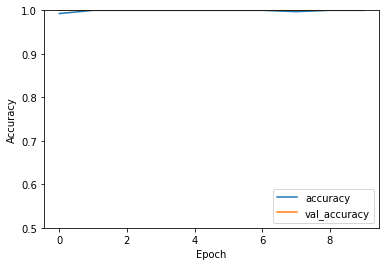

In [85]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [86]:

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 3s - loss: 15.0891 - accuracy: 0.1671


In [87]:
print(test_acc)

0.1670999974012375


In [88]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


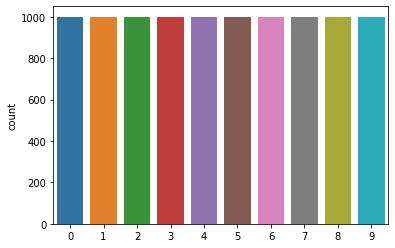

In [89]:
#checking test labels
sns.countplot(test_labels)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


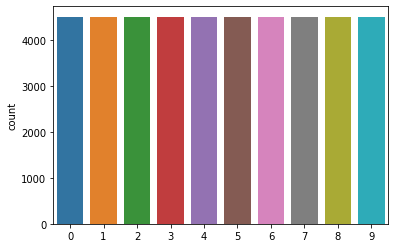

In [90]:
#Checking training labels
sns.countplot(train_labels)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


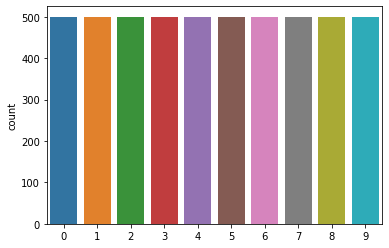

In [91]:
#checking validation labels
sns.countplot(validation_labels)

Duplicate images in train and validation sets!